In [2]:
from bs4 import BeautifulSoup
import urllib.request as REQ 
import urllib
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
import folium

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False
warnings.simplefilter('ignore')

In [ ]:
# 1. 년도, 월별로 멀티인덱스를 설정하고 데이터를 보여주시오
# 2. 2016년 사고대비 사망율을 보여주시오
# 3. 2014년도 월별 사망, 부상 데이터를 바차트로 보여 주시오
# 4. 2015년 대비 사망이 가장 많이 증가한 2016년도 월을 구하시오

In [80]:
# 1. 년도, 월별로 멀티인덱스를 설정하고 데이터를 보여주시오
acc2014=pd.read_csv('2014년 졸음운전 교통사고.csv', engine='python')
acc2015=pd.read_csv('2015년 졸음운전 교통사고.csv', engine='python')
acc2016=pd.read_csv('2016년 졸음운전 교통사고.csv', engine='python')  

acc2014=pd.DataFrame(acc2014)
acc2015=pd.DataFrame(acc2015)
acc2016=pd.DataFrame(acc2016)

acc=pd.concat([acc2014,acc2015,acc2016])
# acc.index=pd.MultiIndex.from_product([['2014','2015','2016'],
#                                       ['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월']], names=['년도','월']) 
# acc.drop(columns=['구분'],inplace=True)

acc['년']=acc['구분'].apply(lambda v:v.split('년')[0])
acc['월']=acc['구분'].apply(lambda v:v.split('년')[1])
acc=acc.pivot_table(index=['년','월'])
acc

부상(명)  사고(건)  사망(명)
년    월                       
2014 10월    392    210     14
     11월    386    209     10
     12월    329    178     12
     1월     347    169      7
     2월     268    145      3
     3월     358    206     12
     4월     360    182      4
     5월     474    218     17
     6월     457    233     13
     7월     431    229     14
     8월     447    222      9
     9월     430    225     15
2015 10월    475    214     14
     11월    398    199      3
     12월    428    213      8
     1월     375    205      8
     2월     375    175      8
     3월     492    237      4
     4월     486    227     10
     5월     504    231      9
     6월     401    207      8
     7월     556    273      7
     8월     534    268     19
     9월     501    252     10
2016 10월    367    183     10
     11월    418    200      5
     12월    364    168      4
     1월     387    192      5
     2월     328    174      6
     3월     435    217      7
     4월     419    216      7
     5월     522    239     13
     6월     362    200     12
     7월     460    227      9
     8월     490    230      7
     9월     347    187     13

In [81]:
# 2. 2016년 사고대비 사망율을 보여주시오
acc.loc['2016']['사망(명)']/acc.loc['2016']['사고(건)']

월
10월    0.054645
11월    0.025000
12월    0.023810
1월     0.026042
2월     0.034483
3월     0.032258
4월     0.032407
5월     0.054393
6월     0.060000
7월     0.039648
8월     0.030435
9월     0.069519
dtype: float64

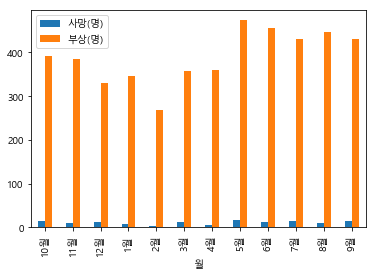

In [82]:
# 3. 2014년도 월별 사망, 부상 데이터를 바차트로 보여 주시오
acc.loc['2014'][['사망(명)','부상(명)']].plot(kind='bar')
plt.show()

In [83]:
# 4. 2015년 대비 사망이 가장 많이 증가한 2016년도 월을 구하시오
dRate=acc.loc['2016']['사망(명)']/acc.loc['2015']['사망(명)']
dRate[dRate==dRate.max()]

월
3월    1.75
Name: 사망(명), dtype: float64